In [45]:
import pybaseball as pyb, pandas as pd, sqlite3 as sql, matplotlib.pyplot as plt, seaborn as sns, numpy as np, datetime as dt, time as tm
pyb.cache.enable()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
#connect to database in Betting/data/statcast/every_pitch_SC.db
conn = sql.connect('Betting/data/statcast/every_pitch_SC.db')
cursor = conn.cursor()



In [100]:
# create sql query to pull all data and column names from 2024 table that "type" == "X"

query = ("""SELECT * FROM '2024' WHERE type == "X" """)

#execute query
cursor.execute(query)

#extract column names from query
col_names = [description[0] for description in cursor.description]

#extract data from query
all_pitches = cursor.fetchall()

#create dataframe from data and column names
all_pitches_SC = pd.DataFrame(all_pitches, columns=col_names)

In [ ]:
# create sql query to pull all data and column names from 2024 table that "type" == "X"

query = ("""SELECT * FROM '2024' WHERE type == "X" """)

#execute query
cursor.execute(query)

#extract column names from query
col_names = [description[0] for description in cursor.description]

#extract data from query
in_play = cursor.fetchall()

#create dataframe from data and column names
in_play_SC = pd.DataFrame(in_play, columns=col_names)

In [20]:
# create sql query to pull all data and column names from 2024 table that "type" == "X"

query = ("""SELECT * FROM '2024' WHERE type == "X" """)

#execute query
cursor.execute(query)

#extract column names from query
col_names = [description[0] for description in cursor.description]

#extract data from query
in_play = cursor.fetchall()

#create dataframe from data and column names
in_play_SC = pd.DataFrame(in_play, columns=col_names)

In [23]:
# create sql query to pull all data and column names from 2024 t

query = ("""SELECT * FROM '2024' WHERE type != "X" """)

#execute query
cursor.execute(query)

#extract column names from query
col_names = [description[0] for description in cursor.description]

#extract data from query
not_in_play = cursor.fetchall()

#create dataframe from data and column names
not_in_play_SC = pd.DataFrame(not_in_play, columns=col_names)

In [54]:
# create sql query to pull all data and column names from 2024 that was a homerun

query = ("""SELECT * FROM '2024' WHERE events == "home_run" """)

#execute query
cursor.execute(query)

#extract column names from query
col_names = [description[0] for description in cursor.description]

#extract data from query
home_runs = cursor.fetchall()

#create dataframe from data and column names
home_runs_SC = pd.DataFrame(home_runs, columns=col_names)

In [55]:
home_runs_SC.shape

(484, 92)

In [48]:
in_play_SC['events']

0        field_out
1        field_out
2        field_out
3        field_out
4         home_run
           ...    
12385    field_out
12386    field_out
12387    field_out
12388       single
12389    field_out
Name: events, Length: 12390, dtype: object

In [41]:
in_play_SC.dropna(axis=1, how='all')
in_play_SC[['on_3b','on_2b','on_1b']].fillna(0, inplace=True)

C:\Users\rhoffpauir\AppData\Local\Temp\ipykernel_43188\3517751587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_play_SC[['on_3b','on_2b','on_1b']].fillna(0, inplace=True)


In [89]:
in_play_SC['pitcher'] = in_play_SC['pitcher'].astype(str)

<Axes: xlabel='effective_speed', ylabel='release_spin_rate'>

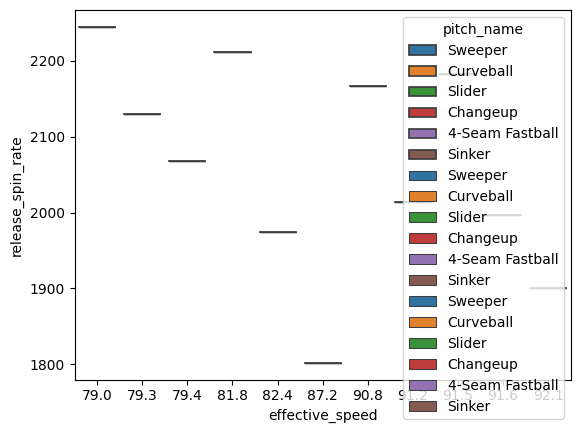

In [110]:
edwin_diaz = all_pitches_SC[all_pitches_SC['player_name'] == 'Diaz, Edwin']
michael_kopech = all_pitches_SC[all_pitches_SC['player_name'] == 'Kopech, Michael']
ben_lively = all_pitches_SC[all_pitches_SC['player_name'] == 'Lively, Ben']
# create a seaborn scatter plot of in_play_SC "pfx_x" vs "pfx_z" as the x and y axis respectively colored by "pitch_type" for every 'bb_type' of 'home_run'

sns.violinplot(data=ben_lively, x='effective_speed', y='release_spin_rate', hue='pitch_name')


<Axes: xlabel='effective_speed', ylabel='release_spin_rate'>

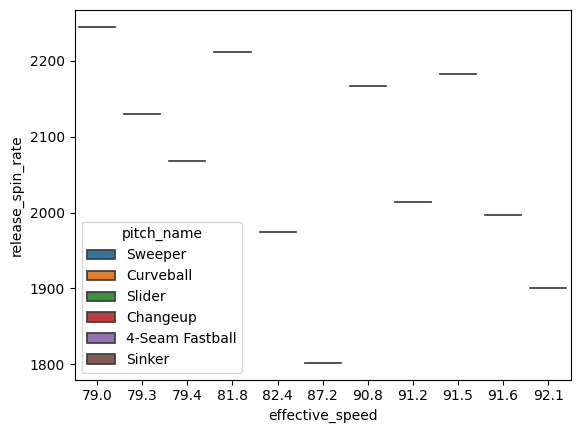

In [112]:
sns.violinplot(data=ben_lively, x='effective_speed', y='release_spin_rate', hue='pitch_name')


In [ ]:
# using pybaseballs pyb.playerid_lookup/pyb.player_searchlist or pyb.playerid_reverse_lookup, create a function that dynamically pulls the player_id for a given player_name

def get_player_id(player_name):
    player_id = pyb.playerid_lookup(player_name)
    return player_id

pyb.rosters(2024)

In [4]:
# PARSING RETROSHEET DATA 

import pandas as pd
from Betting import *


import pandas as pd

def parse_retrosheet_event_file_to_df(file_path):
    games_list = []
    current_game_id = None
    games = {}
    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            record_type = parts[0]
            
            if record_type == 'id':
                # Check if there's a current game being processed and append it before starting a new one
                if current_game_id is not None:
                    games_list.append(games[current_game_id]['info'])

                # New game start
                current_game_id = parts[1]
                games[current_game_id] = {'info': {}, 'plays': []}
            
            elif record_type == 'info':
                # General game information
                key, value = parts[1], parts[2]
                games[current_game_id]['info'][key] = value
            
            elif record_type == 'start':
                # Starting lineup information (not parsed in detail here)
                pass
            
            elif record_type == 'play':
                # Play-by-play action (not saved to DataFrame in this example)
                pass

        # Append the last game info
        if current_game_id is not None:
            games_list.append(games[current_game_id]['info'])

    # Convert the list of game information dictionaries to a DataFrame
    df = pd.DataFrame(games_list)
    return df

# Example usage
file_path = 'Betting/data/retrosheet/2023eve/2023COL.EVN'  # Replace with your actual file path
game_info_df = parse_retrosheet_event_file_to_df(file_path)
print(game_info_df.head())


# Example usage
#file_path = 'Betting/data/retrosheet/2023eve/2023COL.EVN'  # Replace with your actual file path
#game_data = parse_retrosheet_event_file(file_path)


  visteam hometeam   site        date number gametype starttime daynight  \
0     WAS      COL  DEN02  2023/04/06      0  regular    2:10PM      day   
1     WAS      COL  DEN02  2023/04/07      0  regular    6:40PM    night   
2     WAS      COL  DEN02  2023/04/08      0  regular    6:10PM    night   
3     WAS      COL  DEN02  2023/04/09      0  regular    1:10PM      day   
4     SLN      COL  DEN02  2023/04/10      0  regular    6:40PM    night   

  innings tiebreaker usedh   umphome     ump1b     ump2b     ump3b   umplf  \
0       9          2  true  blasc901  torrc901  viscj901  kulpr901  (none)   
1       9          2  true  torrc901  viscj901  kulpr901  blasc901  (none)   
2       9          2  true  viscj901  kulpr901  blasc901  torrc901  (none)   
3       9          2  true  kulpr901  blasc901  torrc901  viscj901  (none)   
4       9          2  true  lives901  belld901  cuzzp901  rippm901  (none)   

    umprf            inputtime howscored  pitches   oscorer temp winddir  

In [2]:
import pybaseball as pyb
pyb.rosters(2024)

AssertionError: 